In [12]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# loading training data
df = pd.read_csv('iris.data.txt',header=None , names=names)
X = np.array(df.iloc[:, 0:4]) 
y = np.array(df['class']) 
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.neighbors import KNeighborsClassifier

# instantiate model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)
print accuracy_score(y_test, pred)



0.98


The optimal number of neighbors is 7


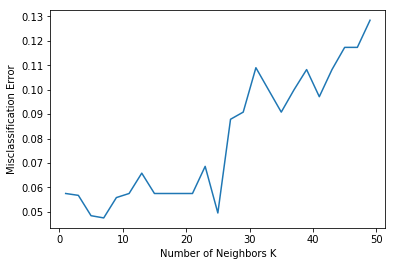

In [21]:
# k-fold validation
from sklearn.model_selection import cross_val_score

myList = list(range(1,50))

neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

    # changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
import matplotlib.pyplot as plt

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()